In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Load Data and Preprocess

In [2]:
# Load the CSV file into a Pandas dataframe
df = pd.read_csv('Emergency_Vehicles/train.csv')

# Get a list of all image filenames in the "train" subfolder
image_filenames = os.listdir('Emergency_Vehicles/train')

# Select the images and labels you want to use for training
X = []
y = []

# Iterate through the rows of the dataframe
for index, row in df.iterrows():
  # Check if the image file exists in the "train" subfolder
  if row['image_names'] in image_filenames:
    # Load the image using OpenCV
    img = cv2.imread(os.path.join('Emergency_Vehicles/train', row['image_names']))

    # Add the image and label to the list of selected images and labels
    X.append(img)
    y.append(row['emergency_or_not'])

In [3]:
# Convert X and y to arrays
X = np.array(X)
y = np.array(y)

# Build Model

In [4]:
# Create a model using the functional API
inputs = tf.keras.Input(shape=(224, 224, 3))
x = tf.keras.layers.Conv2D(32, 3, activation='relu')(inputs)
x = tf.keras.layers.MaxPooling2D()(x)
x = tf.keras.layers.Conv2D(64, 3, activation='relu')(x)
x = tf.keras.layers.MaxPooling2D()(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)
model = tf.keras.Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Split the input data and labels into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=39)

# Fit the model to the training data
history = model.fit(X_train, y_train, epochs=10, batch_size = 88, validation_data=(X_valid, y_valid))

Epoch 1/10
15/15 [==============================] - 68s 5s/step - loss: 323.7628 - accuracy: 0.5008 - val_loss: 4.9458 - val_accuracy: 0.6091
Epoch 2/10
15/15 [==============================] - 69s 5s/step - loss: 1.5900 - accuracy: 0.5418 - val_loss: 0.5917 - val_accuracy: 0.6758
Epoch 3/10
15/15 [==============================] - 70s 5s/step - loss: 0.4948 - accuracy: 0.7918 - val_loss: 0.5309 - val_accuracy: 0.7424
Epoch 4/10
15/15 [==============================] - 69s 5s/step - loss: 0.3596 - accuracy: 0.8868 - val_loss: 0.5326 - val_accuracy: 0.7485
Epoch 5/10
15/15 [==============================] - 69s 5s/step - loss: 0.2102 - accuracy: 0.9597 - val_loss: 0.5309 - val_accuracy: 0.7667
Epoch 6/10
15/15 [==============================] - 71s 5s/step - loss: 0.0961 - accuracy: 0.9810 - val_loss: 0.5506 - val_accuracy: 0.7939
Epoch 7/10
15/15 [==============================] - 71s 5s/step - loss: 0.0537 - accuracy: 0.9848 - val_loss: 0.6026 - val_accuracy: 0.7212
Epoch 8/10
15/15 [

In [5]:
# Print the input shape of the model
print(model.input_shape)

(None, 224, 224, 3)


In [6]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 186624)            0         
_________________________________________________________________
dense (Dense)                (None, 64)                119440

# Evaluate Model

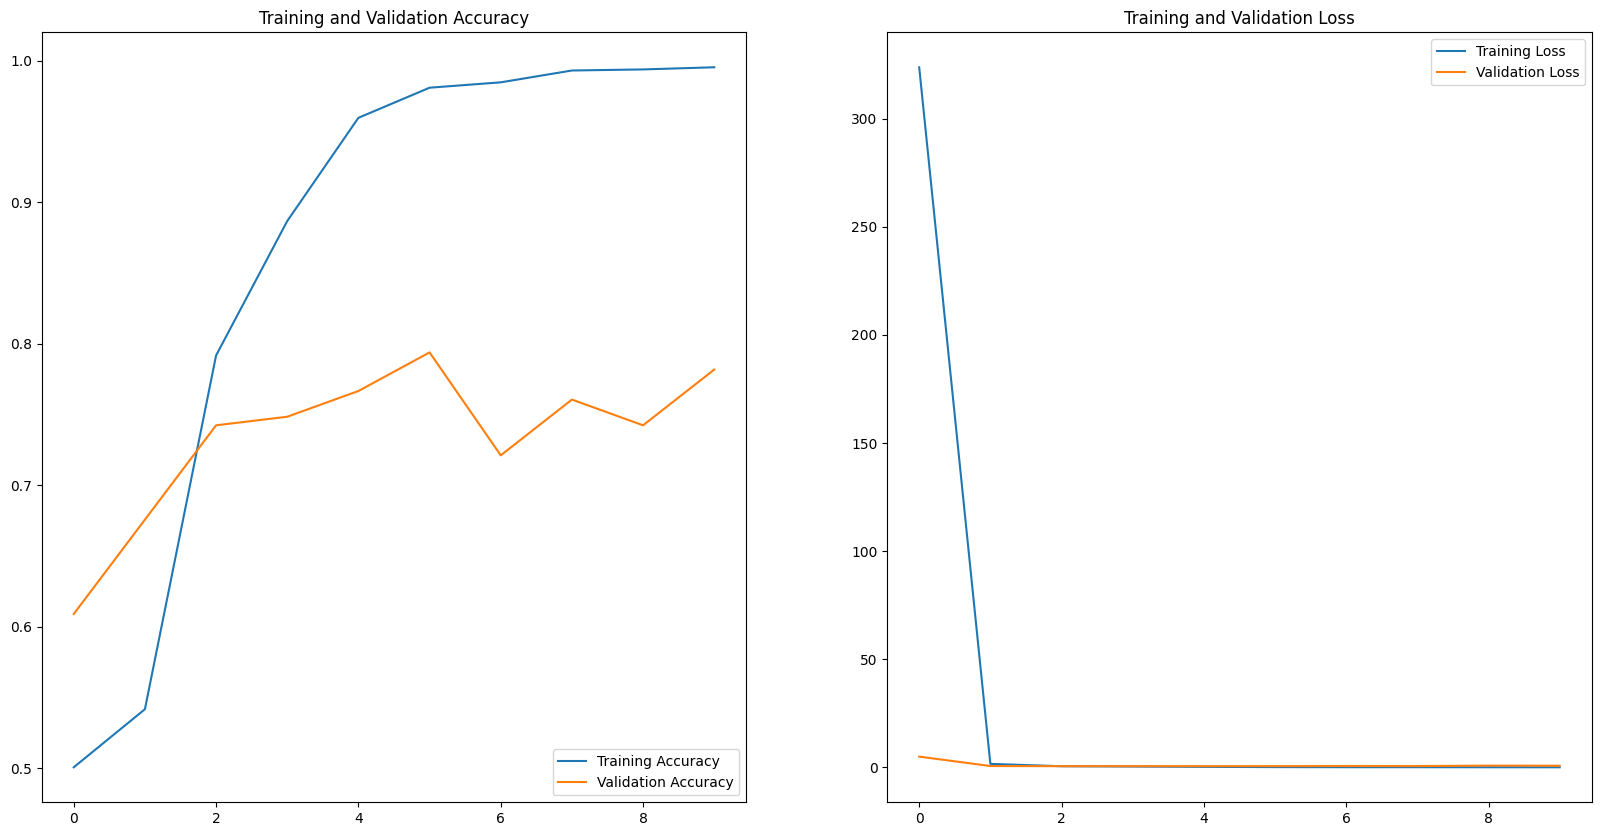

In [10]:
## plotting loss and accuracy
import matplotlib.pyplot as plt

train_accuracy = history.history['accuracy']
validation_acccuracy = history.history['val_accuracy']


train_loss = history.history['loss']
validation_loss = history.history['val_loss']

epochs_range = range(10)
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_accuracy, label='Training Accuracy')
plt.plot(epochs_range, validation_acccuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_loss, label='Training Loss')
plt.plot(epochs_range, validation_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [11]:
# make prediction and evaluate model
pred = model.predict(X_valid)
pred_np =  np.round(pred)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print('Confusion Matrix: \n',confusion_matrix(y_valid, pred_np))
print(classification_report(y_valid, pred_np))
print('Model Accuracy: ', accuracy_score(y_valid, pred_np))

Confusion Matrix: 
 [[167  34]
 [ 38  91]]
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       201
           1       0.73      0.71      0.72       129

    accuracy                           0.78       330
   macro avg       0.77      0.77      0.77       330
weighted avg       0.78      0.78      0.78       330

Model Accuracy:  0.7818181818181819


Text(0.5, 1.0, 'Confusion Matrix')

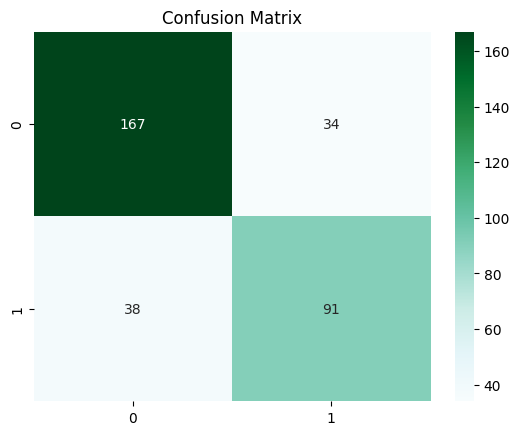

In [12]:
# plot confusion matrix 
sns.heatmap(confusion_matrix(list(y_valid), pred_np, labels=[0, 1]),
            annot = True, fmt='g', cmap='BuGn')
plt.title('Confusion Matrix')

# Test

In [13]:
# Get a list of all image filenames in the "test" subfolder
image_filenames = os.listdir('Emergency_Vehicles/test')

# Select the images you want to use for testing
test = []

# Add the images from the "test" subfolder
for filename in image_filenames:
  # Load the image using OpenCV
  img = cv2.imread(os.path.join('Emergency_Vehicles/test', filename))
  # Add the image to the list of selected images
  test.append(img)

In [14]:
# Convert the list of images to an array
images_array = np.array(test)

# Predict on the array of images using the model
predictions = model.predict(images_array)
predictions = np.round(predictions)

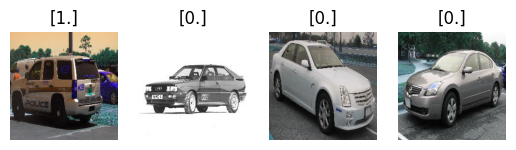

In [17]:
# Set the number of images per batch
batch_size = 4

# Get the predicted class labels for the current batch
predicted_labels = predictions[:batch_size]

# Get the corresponding images for the current batch
images = test[:batch_size]

# Create a figure with a grid of subplots
fig, axes = plt.subplots(1, batch_size)

# Loop through the subplots and plot the images

for i in range(batch_size):
    # Plot the image
    axes[i].imshow(images[i])
    axes[i].set_title(predicted_labels[i])
    axes[i].axis('off')

# Show the figure
plt.show()